In [9]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats
from glob import glob as gb

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [3]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [4]:
input_path = '/g/data/e14/erd561/Australia_3/'

In [5]:
sea_level_z0_1_mod = xr.open_dataset(input_path + 'sea_level_z0_1_mod.nc').sea_level_z0_1_mod*100
print(sea_level_z0_1_mod)
sea_level_z0_1_slope_mod = xr.open_dataset(input_path + 'sea_level_z0_1_slope_mod.nc').sea_level_z0_1_slope_mod*10*100
print(sea_level_z0_1_slope_mod)
sea_level_z0_1_p_value_mod = xr.open_dataset(input_path + 'sea_level_z0_1_p_value_mod.nc').sea_level_z0_1_p_value_mod
print(sea_level_z0_1_p_value_mod)
sea_level_z0_1_std_err_mod = xr.open_dataset(input_path + 'sea_level_z0_1_std_err_mod.nc').sea_level_z0_1_std_err_mod*10*100
print(sea_level_z0_1_std_err_mod)

sea_level_z0_025_mod = xr.open_dataset(input_path + 'sea_level_z0_025_mod.nc').sea_level_z0_025_mod*100
print(sea_level_z0_025_mod)
sea_level_z0_025_slope_mod = xr.open_dataset(input_path + 'sea_level_z0_025_slope_mod.nc').sea_level_z0_025_slope_mod*10*100
print(sea_level_z0_025_slope_mod)
sea_level_z0_025_p_value_mod = xr.open_dataset(input_path + 'sea_level_z0_025_p_value_mod.nc').sea_level_z0_025_p_value_mod
print(sea_level_z0_025_p_value_mod)
sea_level_z0_025_std_err_mod = xr.open_dataset(input_path + 'sea_level_z0_025_std_err_mod.nc').sea_level_z0_025_std_err_mod*10*100
print(sea_level_z0_025_std_err_mod)

sea_level_z0_01_mod = xr.open_dataset(input_path + 'sea_level_z0_01_mod.nc').sea_level_z0_01_mod*100
print(sea_level_z0_01_mod)
sea_level_z0_01_slope_mod = xr.open_dataset(input_path + 'sea_level_z0_01_slope_mod.nc').sea_level_z0_01_slope_mod*10*100
print(sea_level_z0_01_slope_mod)
sea_level_z0_01_p_value_mod = xr.open_dataset(input_path + 'sea_level_z0_01_p_value_mod.nc').sea_level_z0_01_p_value_mod*100
print(sea_level_z0_01_p_value_mod)
sea_level_z0_01_std_err_mod = xr.open_dataset(input_path + 'sea_level_z0_01_std_err_mod.nc').sea_level_z0_01_std_err_mod*10*100
print(sea_level_z0_01_std_err_mod)

<xarray.DataArray 'sea_level_z0_1_mod' (yt_ocean: 160, xt_ocean: 90, year: 25)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-180.62943 , -179.93646 , -179.54231 , ..., -181.87009 ,
         -180.41379 , -180.72781 ],
        [-180.42372 , -179.72704 , -179.32773 , ..., -181.5056  ,
         -180.10028 , -180.39162 ],
        [-180.28194 , -179.5696  , -179.1801  , ..., -181.22693 ,
         -179.937   , -180.22562 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,  

<xarray.DataArray 'sea_level_z0_01_mod' (yt_ocean: 181, xt_ocean: 181, year: 25)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-155.69118 , -153.83368 , -154.53038 , ..., -158.28648 ,
         -157.37204 , -158.66983 ],
        [-155.51173 , -153.86731 , -154.52216 , ..., -158.45482 ,
         -157.39705 , -159.03305 ],
        [-155.30232 , -153.79303 , -154.38841 , ..., -158.56479 ,
         -157.28525 , -159.12645 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,

In [ ]:
AVISO_list = sorted(gb('/g/data/e14/erd561/AVISO/dt_global_allsat_msla_h_y*.nc'))
AVISO_list

GSLA = xr.open_mfdataset(AVISO_list).sla.\
        sel(lon=slice(90,180)).\
        sel(lat=slice(-70,20)) *100

print(GSLA)

GSLA = GSLA.sel(time=slice('1993-01-01', '2017-12-31')).groupby('time.year').mean('time')
GSLA.load()
print(GSLA)

lon = GSLA.lon
lat = GSLA.lat
time = GSLA.year
GSLA_anom = GSLA - GSLA.mean(dim='year')
GSLA_slopes = xr.DataArray(
    np.zeros([lat.shape[0], lon.shape[0]]), dims=(
    'lat', 'lon'), 
    coords=[lat, lon], name='GSLA')
for iid, i in enumerate(lat):
    for jid, j in enumerate(lon):        
        GSLA_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(time, GSLA_anom.sel(lon=j, lat=i))
    print('lat ' + str(np.array(i)))
print(GSLA_slopes)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


<xarray.DataArray 'sla' (time: 312, lat: 360, lon: 360)>
dask.array<mul, shape=(312, 360, 360), dtype=float64, chunksize=(1, 360, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -69.875 -69.625 -69.375 ... 19.375 19.625 19.875
  * lon      (lon) float32 90.125 90.375 90.625 ... 179.375 179.625 179.875
  * time     (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2018-12-15


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'sla' (year: 25, lat: 360, lon: 360)>
array([[[        nan,         nan,         nan, ..., -1.0425    ,
         -0.9675    , -0.99      ],
        [        nan,         nan,         nan, ..., -0.68      ,
         -0.58      , -0.5975    ],
        [        nan,         nan,         nan, ..., -0.52125   ,
         -0.29      , -0.29857143],
        ...,
        [-3.1925    , -1.61833333, -0.24583333, ..., -0.96416667,
         -0.78583333, -0.5525    ],
        [-2.735     , -1.41666667, -0.21      , ..., -1.8525    ,
         -1.85583333, -1.695     ],
        [-2.15083333, -1.19416667, -0.22166667, ..., -2.80166667,
         -2.96916667, -2.9125    ]],

       [[        nan,         nan,         nan, ..., -7.62      ,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -6.08      ,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.28875   ,
         -0.2875    , -0.26375   ],
        ...

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


lat -69.875
lat -69.625
lat -69.375
lat -69.125
lat -68.875
lat -68.625
lat -68.375
lat -68.125
lat -67.875
lat -67.625
lat -67.375
lat -67.125
lat -66.875
lat -66.625
lat -66.375
lat -66.125
lat -65.875
lat -65.625
lat -65.375
lat -65.125
lat -64.875
lat -64.625
lat -64.375
lat -64.125
lat -63.875
lat -63.625
lat -63.375
lat -63.125
lat -62.875
lat -62.625
lat -62.375
lat -62.125
lat -61.875
lat -61.625
lat -61.375
lat -61.125
lat -60.875
lat -60.625
lat -60.375
lat -60.125
lat -59.875
lat -59.625
lat -59.375
lat -59.125
lat -58.875
lat -58.625
lat -58.375
lat -58.125
lat -57.875
lat -57.625
lat -57.375
lat -57.125
lat -56.875
lat -56.625
lat -56.375
lat -56.125
lat -55.875
lat -55.625
lat -55.375
lat -55.125
lat -54.875
lat -54.625
lat -54.375
lat -54.125
lat -53.875
lat -53.625
lat -53.375
lat -53.125
lat -52.875
lat -52.625
lat -52.375
lat -52.125
lat -51.875
lat -51.625
lat -51.375
lat -51.125
lat -50.875
lat -50.625
lat -50.375
lat -50.125
lat -49.875
lat -49.625
lat -49.375
lat 

In [ ]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'Sea surface height ' +
    '\n1993-to-2017 long term mean (a,b,c) in the model and ' +
    '(d) in the observations ' +
    '\n1993-to-2017 decadal trend (e,f,g) in the model and ' +
    '(h) in the observations',
    x=0.6,y=0.99, ha='center')

row=2
col=4

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
levels=arange(-100,100,10)
cmap = plt.cm.RdBu_r
data = sea_level_z0_1_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = sea_level_z0_025_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = sea_level_z0_01_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$cm$', cax=axins)


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0, pos.x1+0.1075, pos.y1] 
print(pos_plot)
levels=arange(-8,8,1)
# cmap = plt.cm.Spectral
data = GSLA.mean('year')
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('d) OceanCurrent LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$cm$', cax=axins)

ax = plt.subplot(row, col, 5, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
levels=arange(-10,10,2)
cmap = plt.cm.RdBu_r
data = sea_level_z0_1_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = sea_level_z0_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-1 trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 6, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = sea_level_z0_025_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = sea_level_z0_025_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-025 trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 7, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = sea_level_z0_01_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = sea_level_z0_01_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('g) ACCESS-OM2-01 trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 8, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0+0.075, pos.x1+0.1075, pos.y1+0.075]
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = sea_level_z0_slope_obs
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = GSLA_slopes
plot2 = plt.contourf(data.lon, data.lat, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('h) OceanCurrent trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$cm \cdot 10\ yrs^{-1}$', cax=axins)

# savefigure('sea_surface_height_absolute')

Bbox(x0=0.125, y0=0.5368181818181819, x1=0.29347826086956524, y1=0.88)
[0.125, 0.5368181818181819, 0.31097826086956526, 0.88]
Bbox(x0=0.3271739130434783, y0=0.5368181818181819, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.5368181818181819, 0.5131521739130435, 0.88]
Bbox(x0=0.5293478260869566, y0=0.5368181818181819, x1=0.6978260869565218, y1=0.88)
[0.5293478260869566, 0.5368181818181819, 0.7153260869565218, 0.88]
Bbox(x0=0.7315217391304348, y0=0.5368181818181819, x1=0.9000000000000001, y1=0.88)
[0.8215217391304348, 0.5368181818181819, 1.0075, 0.88]
Bbox(x0=0.125, y0=0.1250000000000001, x1=0.29347826086956524, y1=0.46818181818181825)
[0.125, 0.20000000000000012, 0.31097826086956526, 0.5431818181818182]
Bbox(x0=0.3271739130434783, y0=0.1250000000000001, x1=0.4956521739130435, y1=0.46818181818181825)
[0.3271739130434783, 0.20000000000000012, 0.5131521739130435, 0.5431818181818182]
Bbox(x0=0.5293478260869566, y0=0.1250000000000001, x1=0.6978260869565218, y1=0.46818181818181825)
[0

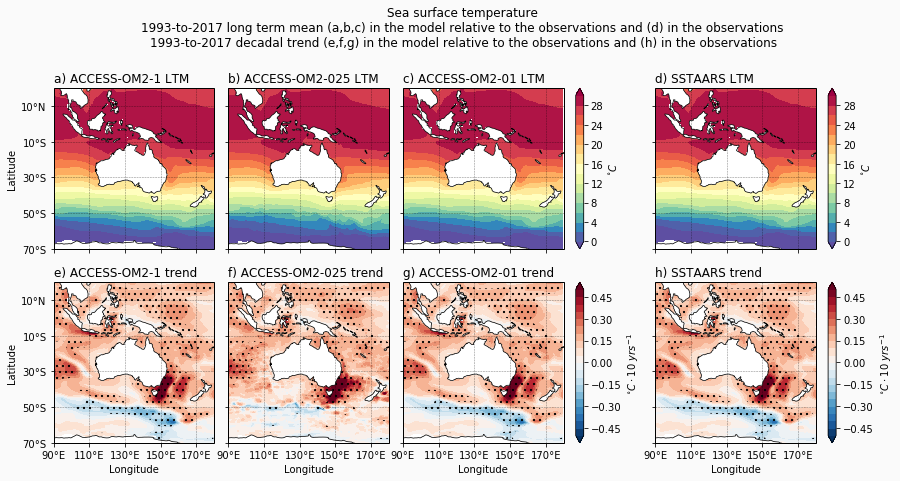

In [32]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'Sea surface sea_levelerature ' +
    '\n1993-to-2017 long term mean (a,b,c) in the model relative to the observations and ' +
    '(d) in the observations ' +
    '\n1993-to-2017 decadal trend (e,f,g) in the model relative to the observations and ' +
    '(h) in the observations',
    x=0.6,y=0.99, ha='center')

row=2
col=4

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
levels=arange(0,30,2)
cmap = plt.cm.Spectral_r
data = sea_level_z0_1_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = sea_level_z0_025_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = sea_level_z0_1_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$^{\circ}C$', cax=axins)

ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0, pos.x1+0.1075, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = sea_level_z0_1_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('d) SSTAARS LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$^{\circ}C$', cax=axins)

ax = plt.subplot(row, col, 5, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
levels=arange(-0.5,0.5,0.05)
cmap = plt.cm.RdBu_r
data = sea_level_z0_1_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = sea_level_z0_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-1 trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 6, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = sea_level_z0_025_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = sea_level_z0_025_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-025 trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 7, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = sea_level_z0_1_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = sea_level_z0_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('g) ACCESS-OM2-01 trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$^{\circ}C \cdot 10\ yrs^{-1}$', cax=axins)

ax = plt.subplot(row, col, 8, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0+0.075, pos.x1+0.1075, pos.y1+0.075] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = sea_level_z0_1_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = sea_level_z0_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('h) SSTAARS trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$^{\circ}C \cdot 10\ yrs^{-1}$', cax=axins)

# savefigure('sea_surface_sea_levelerature_absolute')